# Smartphone Data Analysis Report

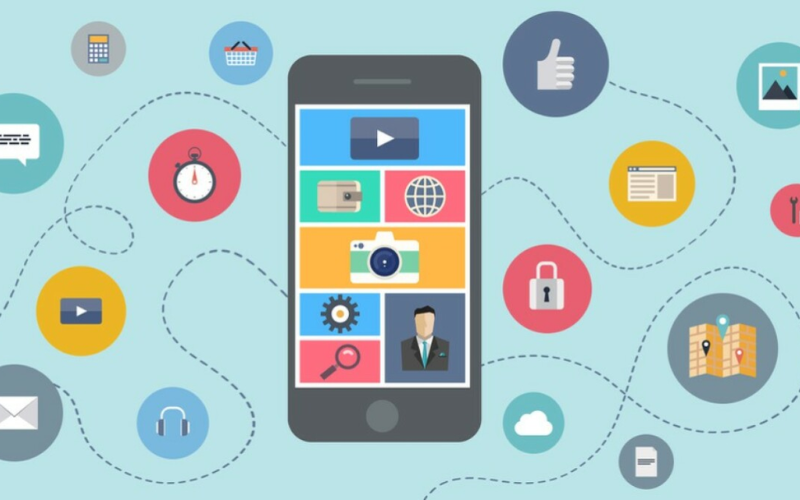

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset
df = pd.read_csv('smartphones_cleaned_v6.csv')

In [3]:
#Data Overview
df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [4]:
#Dimensions
df.shape

(980, 26)

In [5]:
#Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [7]:
# Null check
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [8]:
#Statistical Overview
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000,980.000000,980.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000,1075.852041,2214.663265
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911,290.164931,516.484254
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000,480.000000,480.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000,1080.000000,1612.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000,1080.000000,2400.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000,1080.000000,2408.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000,2460.000000,3840.000000


In [11]:
#Dropiing duplicate records
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(980, 26)

# Exploratory Data Analysis

In [13]:
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

In [22]:
#Top 10 Brands with highest avg price
df1 = df.groupby('brand_name')['price'].mean().round(2).head(10)
df2 = df1.sort_values(ascending = False)

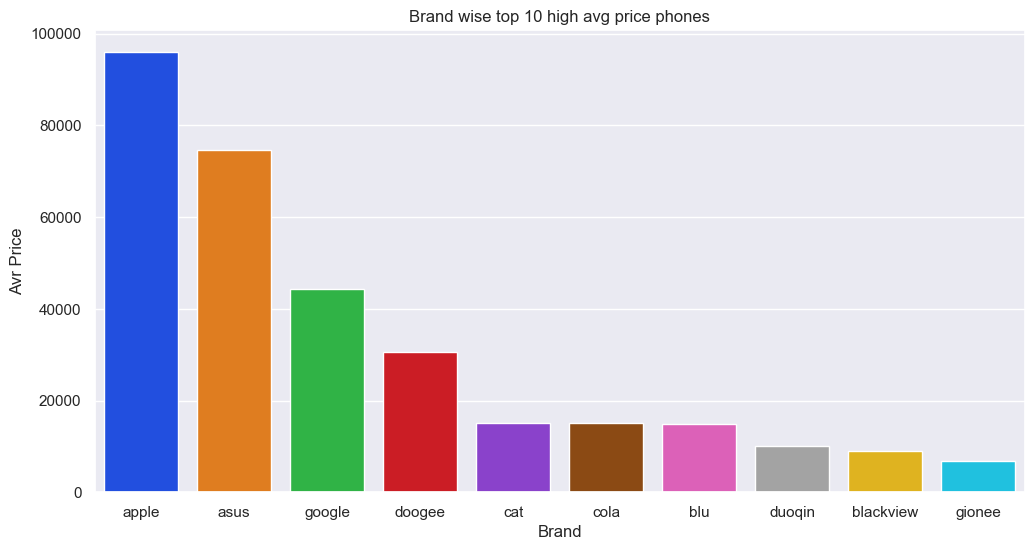

In [31]:
sns.set()
plt.figure(figsize=(12,6))
sns.barplot(x = df2.index, y = df2.values, palette = 'bright')
plt.xlabel('Brand')
plt.ylabel('Avr Price')
plt.title('Brand wise top 10 high avg price phones')
plt.show()

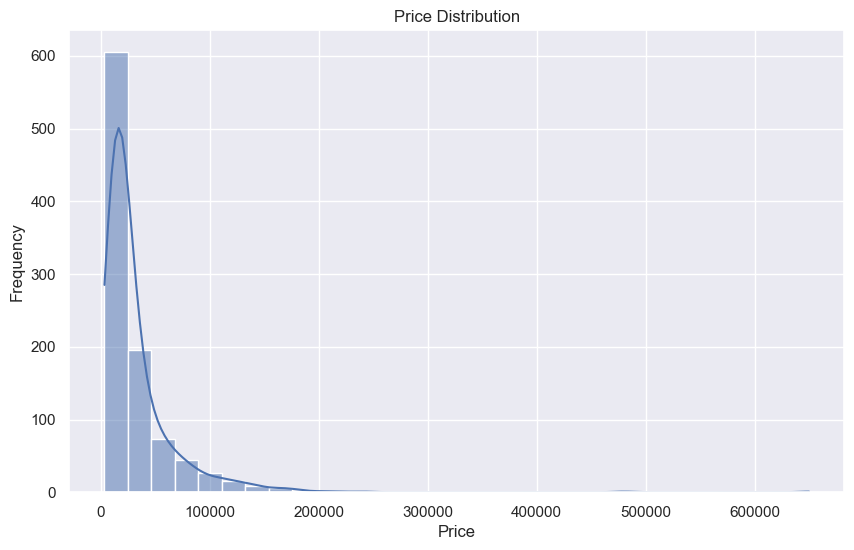

In [32]:
# 1. Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

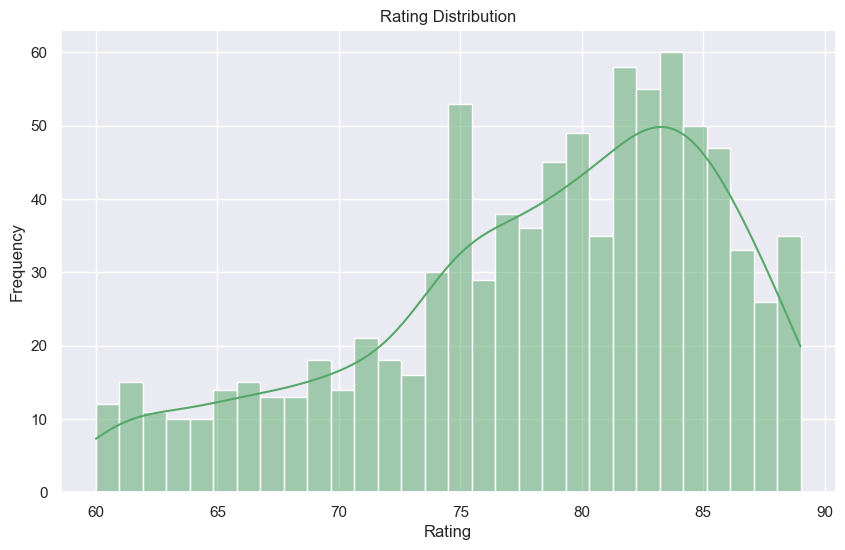

In [35]:
# 2. Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'].dropna(), bins=30, kde=True, color = 'g')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

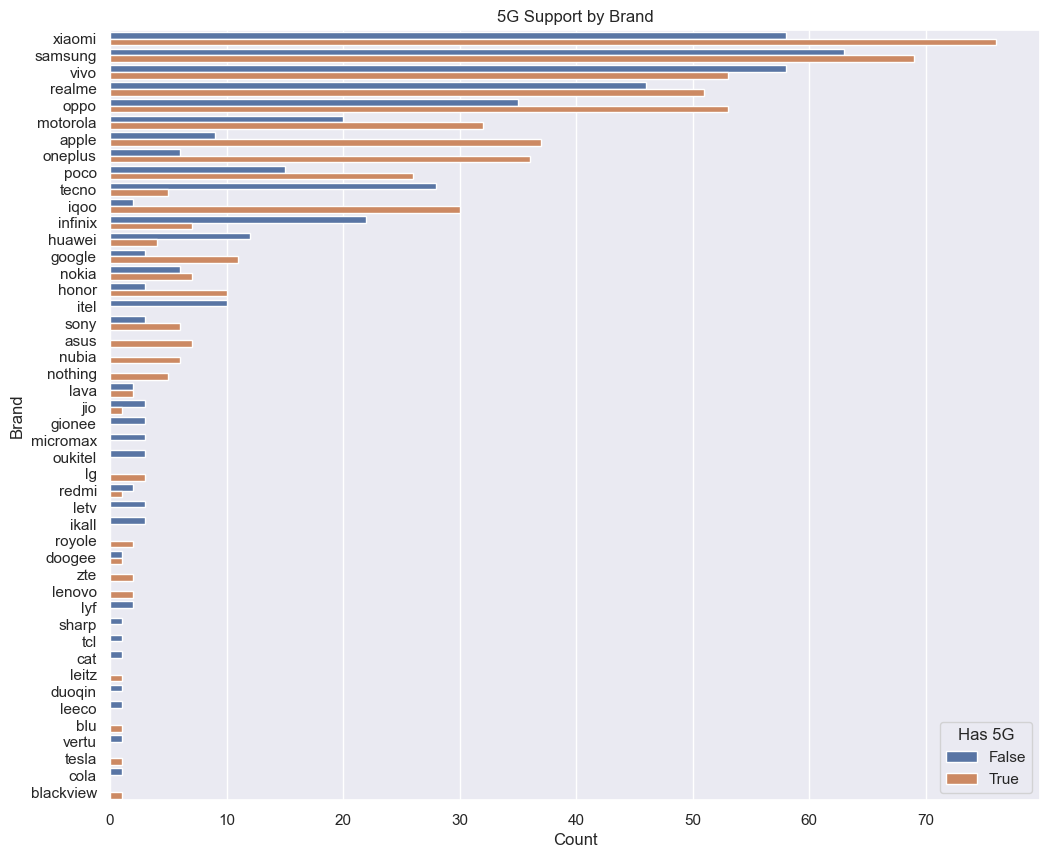

In [36]:
# 3. 5G Support by Brand
plt.figure(figsize=(12, 10))
sns.countplot(y='brand_name', hue='has_5g', data=df, order=df['brand_name'].value_counts().index)
plt.title('5G Support by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.legend(title='Has 5G')
plt.show()

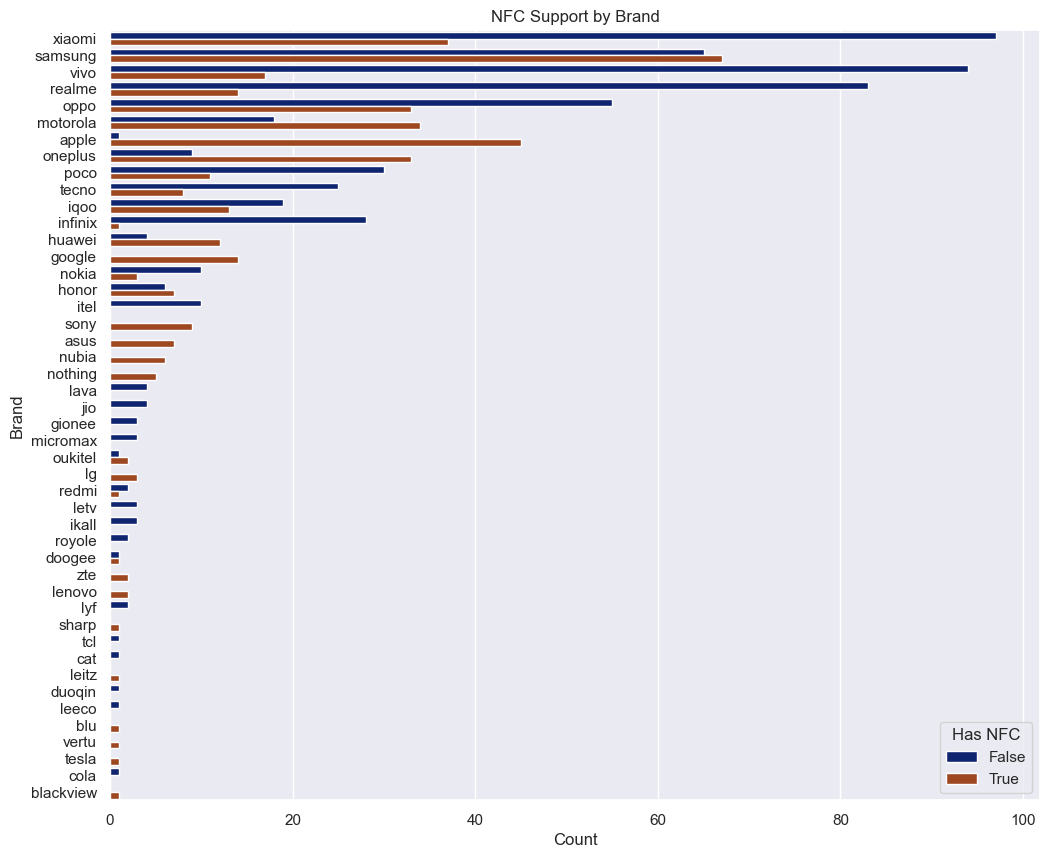

In [37]:
# 4. NFC Support by Brand
plt.figure(figsize=(12, 10))
sns.countplot(y='brand_name', hue='has_nfc', data=df, order=df['brand_name'].value_counts().index, palette = 'dark')
plt.title('NFC Support by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.legend(title='Has NFC')
plt.show()

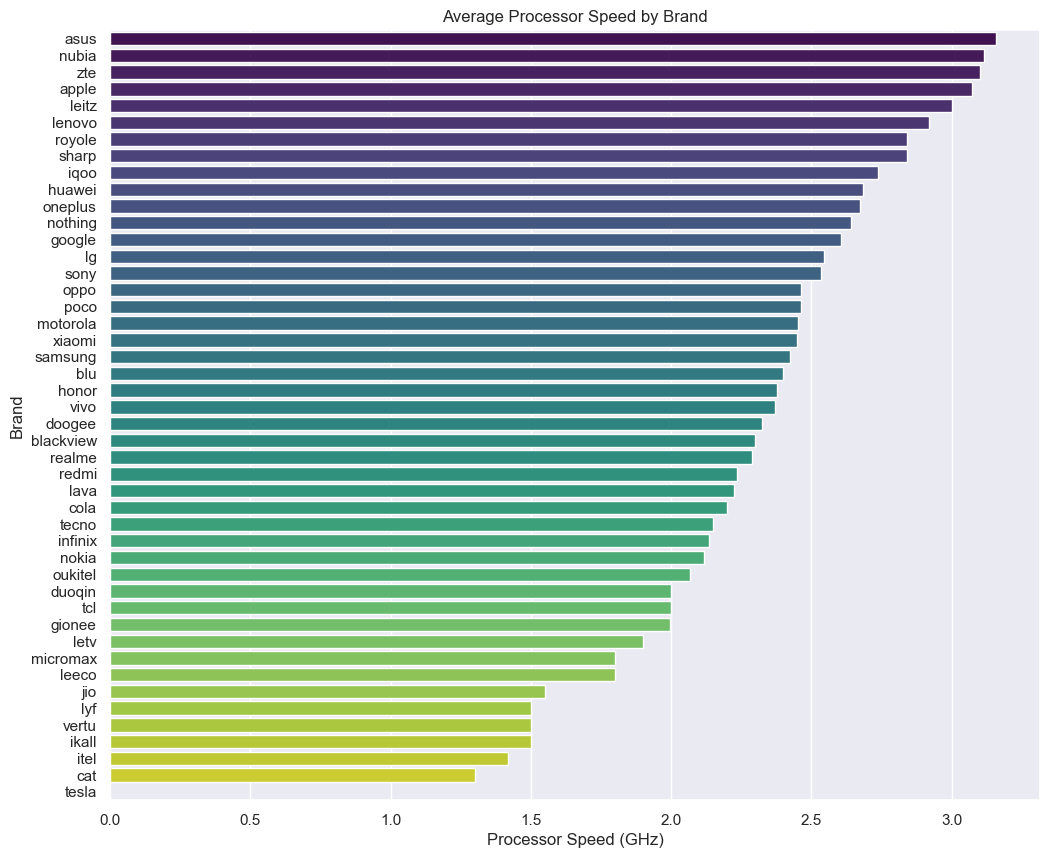

In [40]:
# 5. Average Processor Speed by Brand
plt.figure(figsize=(12, 10))
sns.barplot(y='brand_name', x='processor_speed', data=df, estimator=lambda x: x.mean(), order=df.groupby('brand_name')['processor_speed'].mean().sort_values(ascending=False).index, ci = None, palette = 'viridis')
plt.title('Average Processor Speed by Brand')
plt.xlabel('Processor Speed (GHz)')
plt.ylabel('Brand')
plt.show()

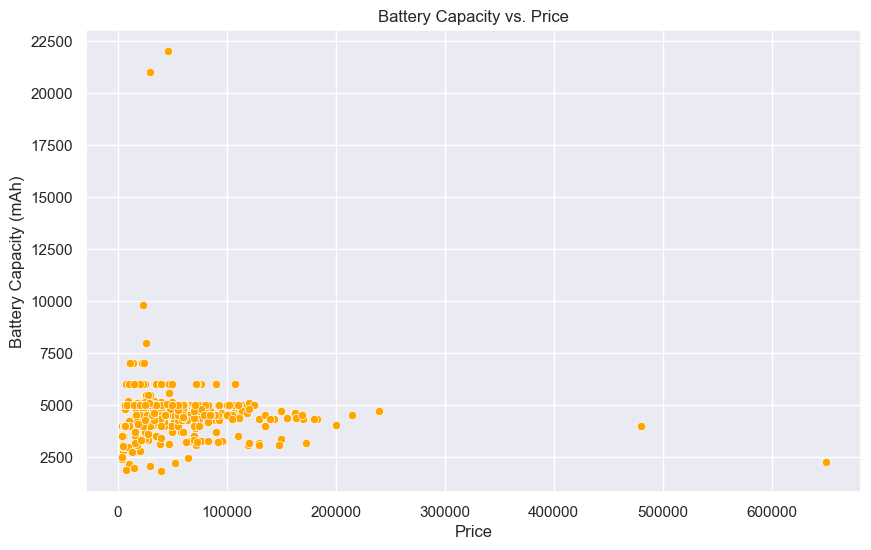

In [42]:
# 6. Battery Capacity vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='battery_capacity', data=df, color = 'orange')
plt.title('Battery Capacity vs. Price')
plt.xlabel('Price')
plt.ylabel('Battery Capacity (mAh)')
plt.show()

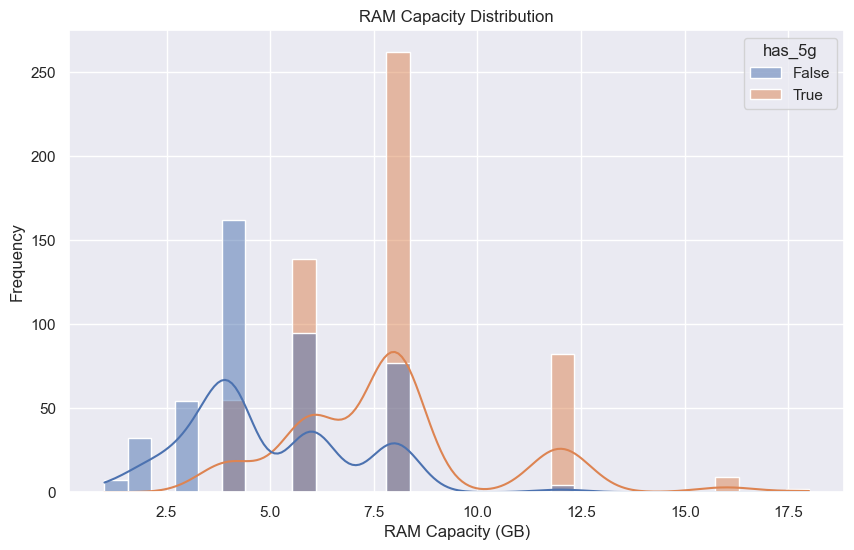

In [47]:
# 7. RAM Capacity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(x = 'ram_capacity', data = df, bins=30, kde=True, hue = 'has_5g')
plt.title('RAM Capacity Distribution')
plt.xlabel('RAM Capacity (GB)')
plt.ylabel('Frequency')
plt.show()

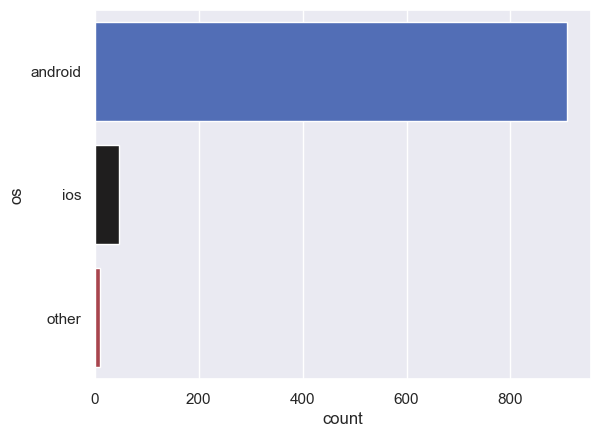

In [57]:
sns.countplot(y = 'os', data = df, palette = 'icefire' )
plt.show()

In [62]:
#Correlation
corr_matrix  = df.select_dtypes(include=['int','float']).corr()

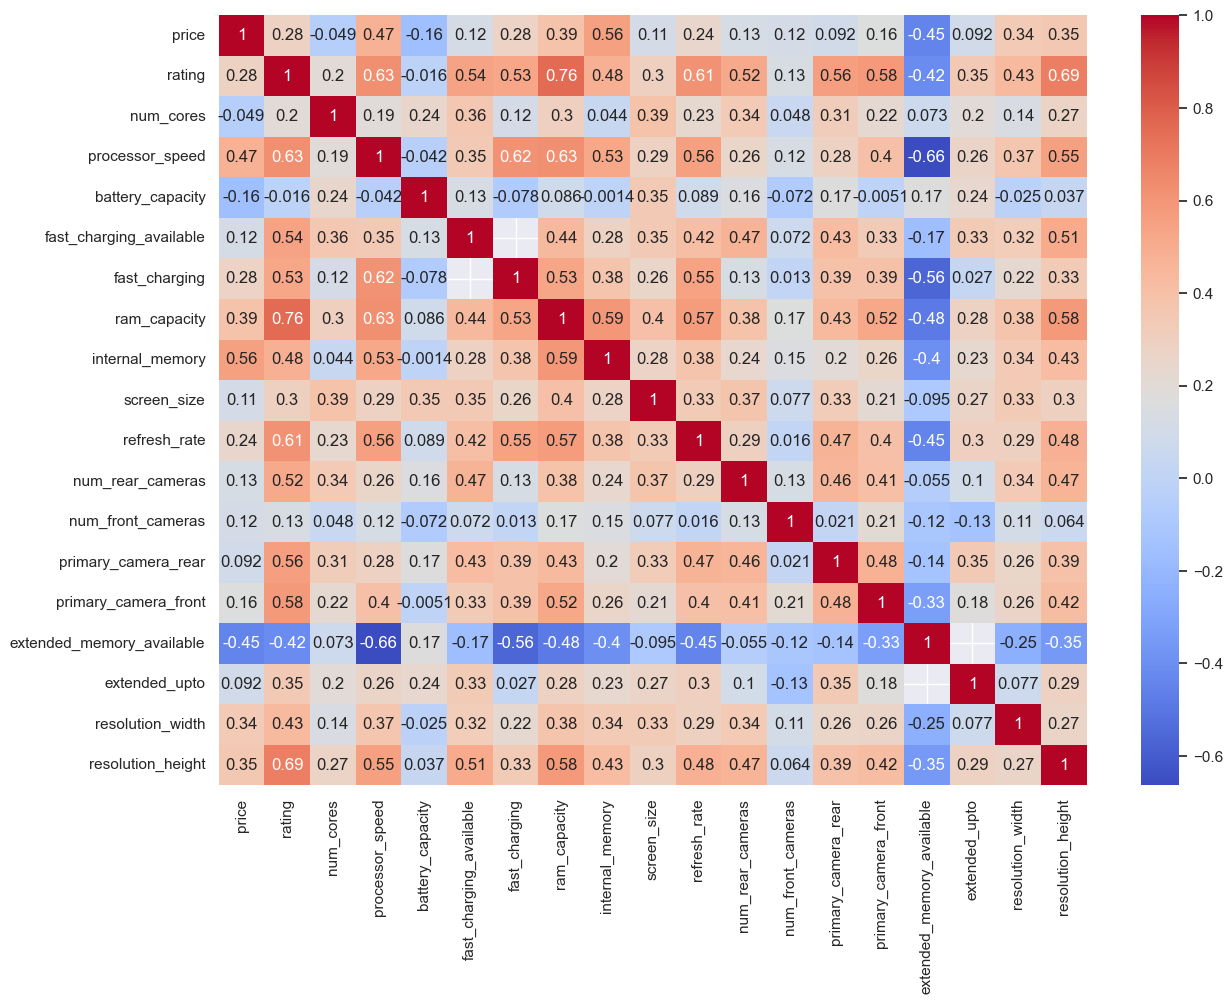

In [69]:
# Heatmap for correlation
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True)
plt.show()